In [174]:
 #install all necesarry add on
 !pip install bs4
 !conda install -c conda-forge geopy --yes
 !pip install requests
 !pip install html5lib
 !pip install lxml
 !pip install wget
 !pip install geopandas

In [175]:
import pandas as pd
import numpy as np

import geopandas as gpd

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from geopy.distance import great_circle

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import json # library to handle JSON files

import requests # library to handle requests
from requests import get

from bs4 import BeautifulSoup

import re

from time import sleep

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import seaborn as sns

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans
import time

In [176]:
#Download Vilnius coordintes from Vilnius Municipality open API
!wget -q -O 'vilnius_data.json' https://opendata.arcgis.com/datasets/6d5088b44dba4643a6611455d5352268_1.geojson
print('Data downloaded!')

Data downloaded!


In [177]:
#Open the file
with open('vilnius_data.json') as json_data:
    vilnius_data = json.load(json_data)

In [178]:
#Read file
vilnius = gpd.read_file("vilnius_data.json")
vilnius["center"] = vilnius["geometry"].centroid
vilnius_points = vilnius.copy()
vilnius_points.set_geometry("center", inplace = True)

In [179]:
vilnius_points

,OBJECTID,NR,SENIUNIJA,SHAPEarea,SHAPElen,geometry,center
0,1,15,Rasos,1.623036e+07,29906.439954,"POLYGON ((25.33184 54.69413, 25.33062 54.69437...",POINT (25.31858 54.65646)
1,2,17,Naujamiestis,4.898428e+06,12473.602412,"POLYGON ((25.26400 54.69584, 25.26230 54.69556...",POINT (25.26608 54.67892)
2,3,16,Senamiestis,4.406772e+06,9918.814267,"POLYGON ((25.27990 54.69142, 25.27983 54.69104...",POINT (25.29281 54.68130)
3,4,18,Vilkpėdė,1.075213e+07,22289.092939,"POLYGON ((25.23641 54.69177, 25.23584 54.69146...",POINT (25.22674 54.66015)
4,5,11,Lazdynai,9.955368e+06,13665.148004,"POLYGON ((25.19172 54.68308, 25.18949 54.68094...",POINT (25.20535 54.66795)
5,6,19,Naujininkai,4.426755e+07,32797.955156,"POLYGON ((25.28985 54.66556, 25.28988 54.66559...",POINT (25.26174 54.62564)
6,7,21,Grigiškės,7.004640e+06,19440.887777,"POLYGON ((25.06988 54.69054, 25.06823 54.69034...",POINT (25.10079 54.67256)
7,8,20,Paneriai,7.817616e+07,69115.168033,"POLYGON ((25.02460 54.62316, 25.02470 54.62315...",POINT (25.13977 54.62279)
8,9,1,Verkiai,5.596280e+07,50909.032496,"POLYGON ((25.32052 54.82729, 25.31816 54.82866...",POINT (25.30772 54.77457)
9,10,13,Antakalnis,7.715076e+07,53347.926472,"POLYGON ((25.36070 54.81638, 25.36000 54.81825...",POINT (25.38136 54.75007)


In [180]:
vilnius_points['lat'] = vilnius_points.center.apply(lambda p: p.y)
vilnius_points['lon'] = vilnius_points.center.apply(lambda p: p.x)

In [181]:
vilnius_districts =vilnius_points.drop(['OBJECTID', 'NR', 'SHAPEarea', 'SHAPElen','center', 'geometry'], axis=1)

In [182]:
#Add extra column with English symbols for all Vilnius districts in order to corretly display them on a map

List=['Rasos', 'Naujamiestis', 'Senamiestis', 'Vilkpede', 'Lazdynai', 'Naujininkai', 'Grigiskes', 'Paneriai', 'Verkiai', 
      'Antakalnis', 'Pasilaiciai', 'Fabijoniskes', 'Zirmunai', 'Pilaite', 'Justiniskes', 'Seskine', 'Naujoji Vilnia', 'Virsuliskes', 'Snipiskes',
     'Zverynas', 'Karoliniskes']

vilnius_districts['District'] = np.array(List)
vilnius_districts=vilnius_districts.rename(columns={'SENIUNIJA': 'District', 'District': 'District(eng)'})

In [183]:
vilnius_districts

,District,lat,lon,District(eng)
0,Rasos,54.656456,25.318583,Rasos
1,Naujamiestis,54.678918,25.266083,Naujamiestis
2,Senamiestis,54.681296,25.292811,Senamiestis
3,Vilkpėdė,54.660149,25.226736,Vilkpede
4,Lazdynai,54.667952,25.205353,Lazdynai
5,Naujininkai,54.625639,25.261739,Naujininkai
6,Grigiškės,54.672558,25.100786,Grigiskes
7,Paneriai,54.622787,25.139768,Paneriai
8,Verkiai,54.774566,25.307723,Verkiai
9,Antakalnis,54.750065,25.381356,Antakalnis


In [184]:
#Print how many districts Vilnius city has
print('The dataframe has {} neighborhoods.'.format(
        len(vilnius_districts['District'].unique()),
        vilnius_districts.shape[0]
    )
)

The dataframe has 21 neighborhoods.


In [185]:
#Get geographical coordinates of Vilnius
address = 'Vilnius, LT'

geolocator = Nominatim(user_agent="vilnius")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Vilnius are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Vilnius are 54.6870458, 25.2829111.


In [186]:
# create map of Vilnius using latitude and longitude values
map_vilnius = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(vilnius_districts['lat'], vilnius_districts['lon'], vilnius_districts['District(eng)']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vilnius)  
    
map_vilnius

In [187]:
#There were ~70 pages of information for last 30 days of appartments for sale in Vilnius. Lets make an empty list of 70 pages.
pages = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70]
listings=[]


for page in pages:
    
    # load the response
    response =requests.get('https://www.aruodas.lt/butai/vilniuje/puslapis/{}/?FAddDate=30&detailed_search=1'.format(page)).text
    soup = BeautifulSoup(response, 'html.parser')
    for elem in soup.find_all(["a", "p", "div", "h3", "br"]):
        elem.append('\n')
   
     # find all outer containers of listings
    for results in soup.find_all(class_="list-row"):
    
        try:
            neighbor=results.h3.text.split()[0]
        except:
            neighbor = None

        try:
            street_test = results.find('h3').text.split()[1:]
            street = [' '.join(street_test)]
        except:
            street = None

        try:
            prices = results.find(class_='price').text.split()[:-1]
            price = [' '.join(prices[0:2])]
        except:
            price = None

        try:
            pricesqm=[' '.join(prices[3:])]
        except:
            pricessqm = None

        try:
            area = results.find(class_='list-AreaOverall').text.split()[0]
        except:
            area = None

        try:
            rooms = results.find(class_='list-RoomNum').text.split()[0]
        except:
            rooms = None

        listings.append([neighbor, street, area, rooms, price])
     
        # set sleep to mimic a more human behaviour and don't overload the site with requests
        time.sleep(2)

In [188]:
#Make new columnts and put all webscrapped data to new dataset
column_names = ['District', 'Street', 'Area', 'Rooms', 'Price']
rental_properties = pd.DataFrame(listings, columns=column_names)

In [189]:
print('There are {} apartments in the dataset'.format(rental_properties.shape[0]))

In [190]:
#Load dataset to csv
rental_properties.to_csv('rental_properties_full1.csv')

In [191]:
#Read csv file
rental_properties1=pd.read_csv('rental_properties_full1.csv',index_col=None)
rental_properties1.drop(rental_properties1.columns[[0]], axis=1, inplace=True)
rental_properties1.head()

,District,Street,Area,Rooms,Price
0,Pilaitė,['Tolminkiemio g.'],31.5,1.0,['48 000']
1,Markučiai,['Manufaktūrų g.'],36.8,1.0,['82 000']
2,Pilaitė,['Tolminkiemio g.'],60.0,3.0,['109 500']
3,Pilaitė,['Tolminkiemio g.'],65.7,3.0,['116 500']
4,Pilaitė,['Tolminkiemio g.'],45.0,2.0,['83 500']


In [192]:
#Clean the table removing brackets and exclamation symbols
rental_properties1.dropna(subset = ['District'], inplace=True)
rental_properties1['Street'] = rental_properties1['Street'].astype('string')
rental_properties1['Street'] = rental_properties1['Street'].str.replace("'", "").str.replace('[','').str.replace(']','')
rental_properties1['Price'] = rental_properties1['Price'].astype('string')
rental_properties1['Price'] = rental_properties1['Price'].str.replace("'", "").str.replace('[','').str.replace(']','').str.replace('Kaina padidėjusi','NaN').str.replace('Kaina sumažėjusi','Nan').str.replace(' ','').astype('float')

In [193]:
 rental_properties1.head()

,District,Street,Area,Rooms,Price
0,Pilaitė,Tolminkiemio g.,31.5,1.0,48000.0
1,Markučiai,Manufaktūrų g.,36.8,1.0,82000.0
2,Pilaitė,Tolminkiemio g.,60.0,3.0,109500.0
3,Pilaitė,Tolminkiemio g.,65.7,3.0,116500.0
4,Pilaitė,Tolminkiemio g.,45.0,2.0,83500.0


In [194]:
#Get general description of dataset including averages, median, standard deviation
rental_properties1.describe()

,Area,Rooms,Price
count,2072.000000,2072.000000,1896.000000
mean,63.059561,2.484556,130964.905063
std,34.264982,1.065119,102531.314973
min,10.000000,1.000000,1500.000000
25%,42.495000,2.000000,71000.000000
50%,58.000000,2.000000,99067.000000
75%,75.910000,3.000000,155000.000000
max,680.000000,20.000000,980000.000000


In [195]:
#Remove NaN values
rental_properties1.dropna(subset=['District', 'Street', 'Area', 'Rooms', 'Price'], inplace=True)

In [196]:
#Find how many appartments we analyze
print('There are {} apartments in the dataset'.format(rental_properties1.shape[0]))

There are 1896 apartments in the dataset


In [197]:
#Find appartment types by room numbers
rental_properties1['Rooms'].value_counts()

2.0     678
3.0     625
1.0     313
4.0     228
5.0      45
6.0       5
7.0       1
20.0      1
Name: Rooms, dtype: int64

In [198]:
#We see that there are not so many appartments with rooms more than 5. Let's remove them, because they will be as outliers
rental_properties1 = rental_properties1[rental_properties1['Rooms'] <= 5]

[Text(0, 0, 'Pilaitė'),
 Text(0, 0, 'Markučiai'),
 Text(0, 0, 'Antakalnis'),
 Text(0, 0, 'Vilkpėdė'),
 Text(0, 0, 'Šnipiškės'),
 Text(0, 0, 'Užupis'),
 Text(0, 0, 'Valakampiai'),
 Text(0, 0, 'Fabijoniškės'),
 Text(0, 0, 'Justiniškės'),
 Text(0, 0, 'Naujamiestis'),
 Text(0, 0, 'Lazdynėliai'),
 Text(0, 0, 'Senamiestis'),
 Text(0, 0, 'Pašilaičiai'),
 Text(0, 0, 'Šeškinė'),
 Text(0, 0, 'Žvėrynas'),
 Text(0, 0, 'Verkiai'),
 Text(0, 0, 'Žirmūnai'),
 Text(0, 0, 'Viršuliškės'),
 Text(0, 0, 'Kalnėnai'),
 Text(0, 0, 'Karoliniškės'),
 Text(0, 0, 'Santariškės'),
 Text(0, 0, 'Naujoji Vilnia'),
 Text(0, 0, 'Bajorai'),
 Text(0, 0, 'Pavilnys'),
 Text(0, 0, 'Saulėtekis'),
 Text(0, 0, 'Tarandė'),
 Text(0, 0, 'Visoriai'),
 Text(0, 0, 'Lazdynai'),
 Text(0, 0, 'Grigiškės'),
 Text(0, 0, 'Šiaurės miestelis'),
 Text(0, 0, 'Žemieji Paneriai'),
 Text(0, 0, 'Baltupiai'),
 Text(0, 0, 'Dvarčionys'),
 Text(0, 0, 'Naujininkai'),
 Text(0, 0, 'Jeruzalė'),
 Text(0, 0, 'Aukštieji Paneriai'),
 Text(0, 0, 'Trakų'),
 Text(

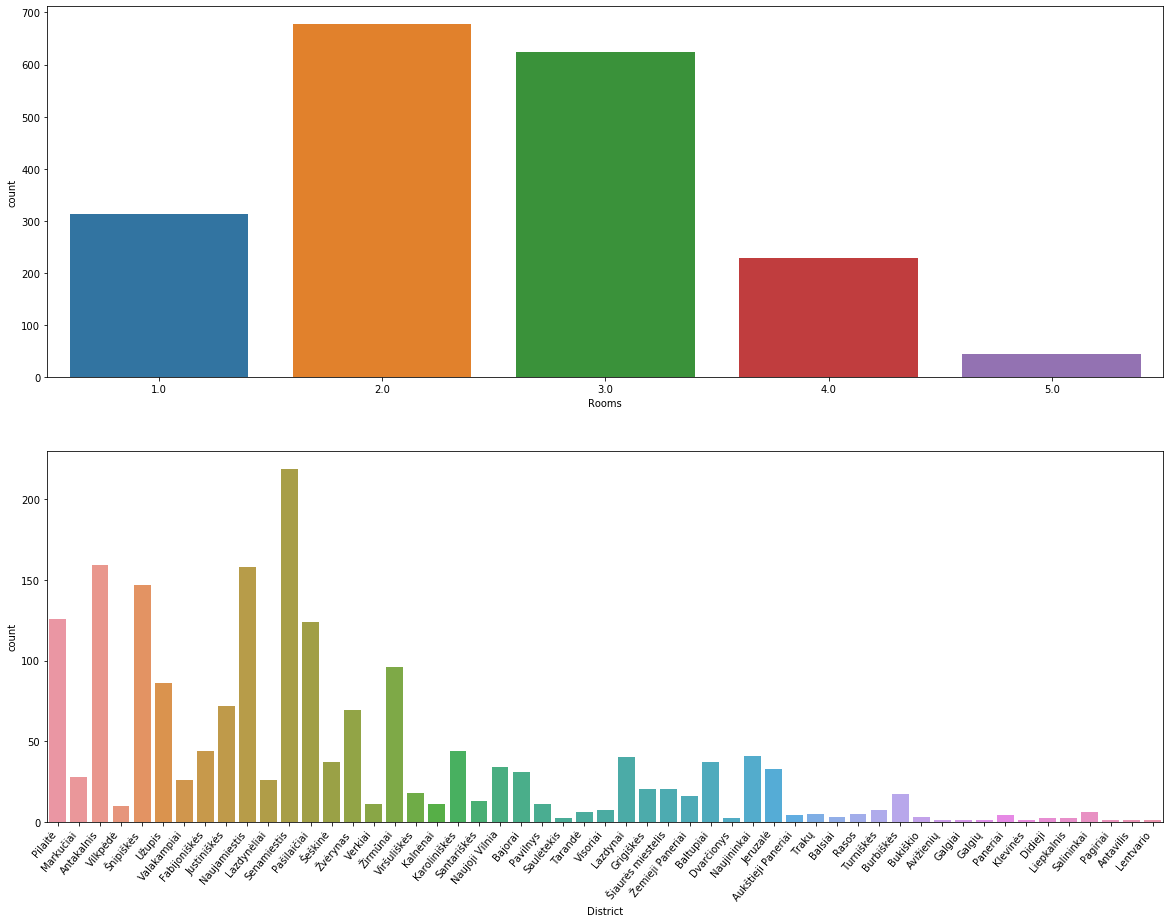

In [199]:
#Plot the appartments by room numbers. We see that the largest amount of appartments consist of 2 rooms.
fig, ax =plt.subplots(2,1, figsize=(20,15))
sns.countplot(rental_properties1['Rooms'], ax=ax[0])
#Also plot the apparments by disctrict. We see that largest amount of appartments for sale are located in Senamiestis, Naujamiestis and Antakalnis disctricts.
sns.countplot(rental_properties1['District'], ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=50, ha="right")

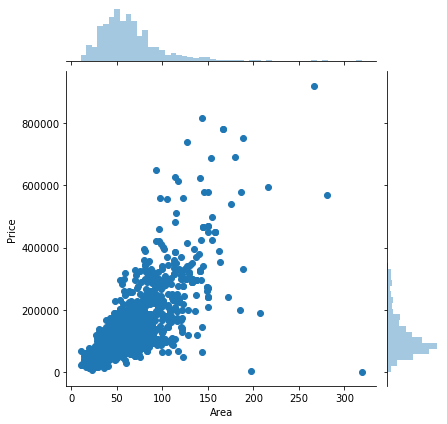

In [200]:
#Plot the dataset according to appartment Price and Area
sns.jointplot(x='Area', y='Price', data=rental_properties1[['Area','Price']])

In [201]:
#We see that there are some big appartments with very large prices. Let's remove appartments with prices larger than 500 000EUR and area larger than 200m2 and treat them as outliers.
rental_properties1 = rental_properties1[rental_properties1['Price'] <= 500000]
rental_properties1 = rental_properties1[rental_properties1['Area'] <= 200]

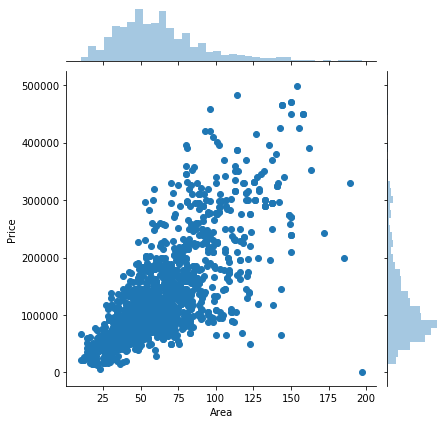

In [202]:
#Plot the data without outliers.
sns.jointplot(x='Area', y='Price', data=rental_properties1[['Area','Price']])

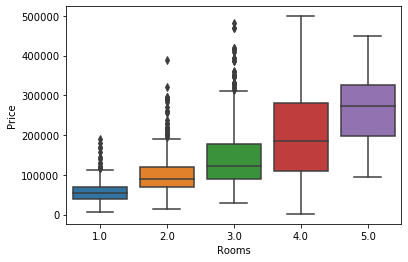

In [203]:
#Get the boxplot of appartment data. No big suprises. Still the median price for 2 and 3 room appartments differs not so much.
sns.boxplot(x='Rooms', y='Price', data=rental_properties1)

In [204]:
#Calculate average prices per sq m and put it as extra column in dataset
rental_properties1['Price/m2'] = (rental_properties1['Price']/rental_properties1['Area']).round(2)
rental_properties1.head()

,District,Street,Area,Rooms,Price,Price/m2
0,Pilaitė,Tolminkiemio g.,31.5,1.0,48000.0,1523.81
1,Markučiai,Manufaktūrų g.,36.8,1.0,82000.0,2228.26
2,Pilaitė,Tolminkiemio g.,60.0,3.0,109500.0,1825.00
3,Pilaitė,Tolminkiemio g.,65.7,3.0,116500.0,1773.21
4,Pilaitė,Tolminkiemio g.,45.0,2.0,83500.0,1855.56


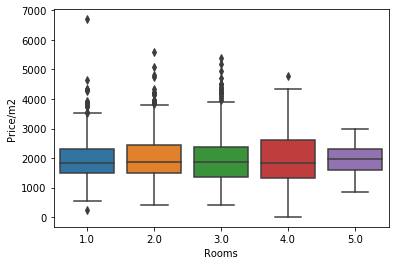

In [205]:
#Make another boxplot checking the differencies of average price per sq.m. and room numbers. We see that there are no big differencies in price per sq.m. and only big apparments with 5 rooms prices per sq.m. is higher.
sns.boxplot(x='Rooms', y='Price/m2', data=rental_properties1)

In [206]:
rental_properties1.describe()

,Area,Rooms,Price,Price/m2
count,1865.000000,1865.000000,1865.000000,1865.000000
mean,61.375962,2.458445,123414.273458,1988.248268
std,27.885605,0.970330,80592.620877,770.167090
min,10.000000,1.000000,1600.000000,8.120000
25%,42.260000,2.000000,70000.000000,1439.660000
50%,57.620000,2.000000,98960.000000,1847.060000
75%,75.000000,3.000000,149900.000000,2403.230000
max,197.000000,5.000000,499000.000000,6700.000000


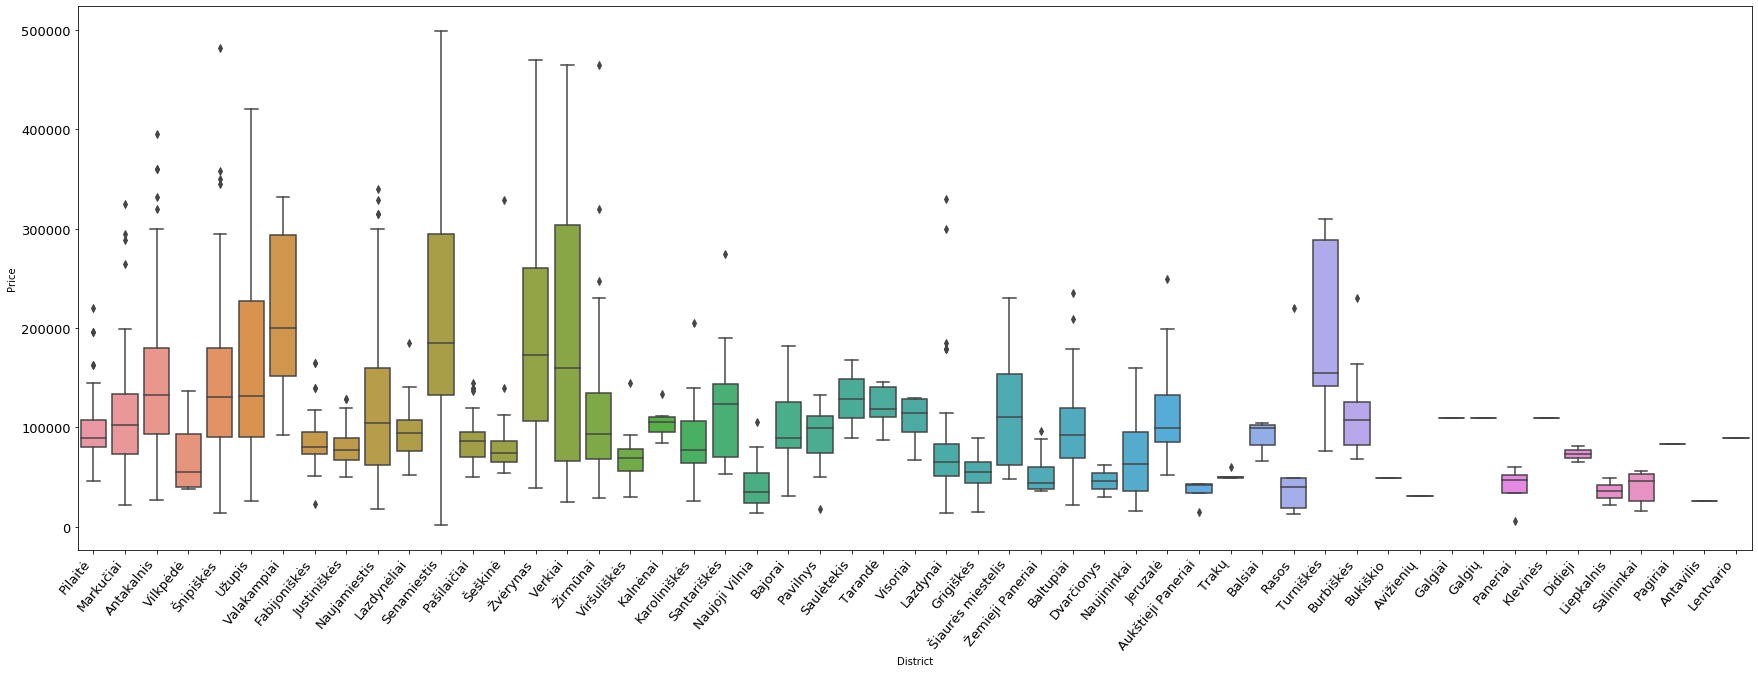

In [207]:
#Let's figure out and plot apparment prices by each district. Its interesting that we have the same high median for appartments in Old Town (Senamiestis) and Valakampiai, which is treated more as recreational part of the city.
plt.figure(figsize=(30,10))
ax = sns.boxplot(x='District', y='Price', data=rental_properties1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.tick_params(labelsize=13)

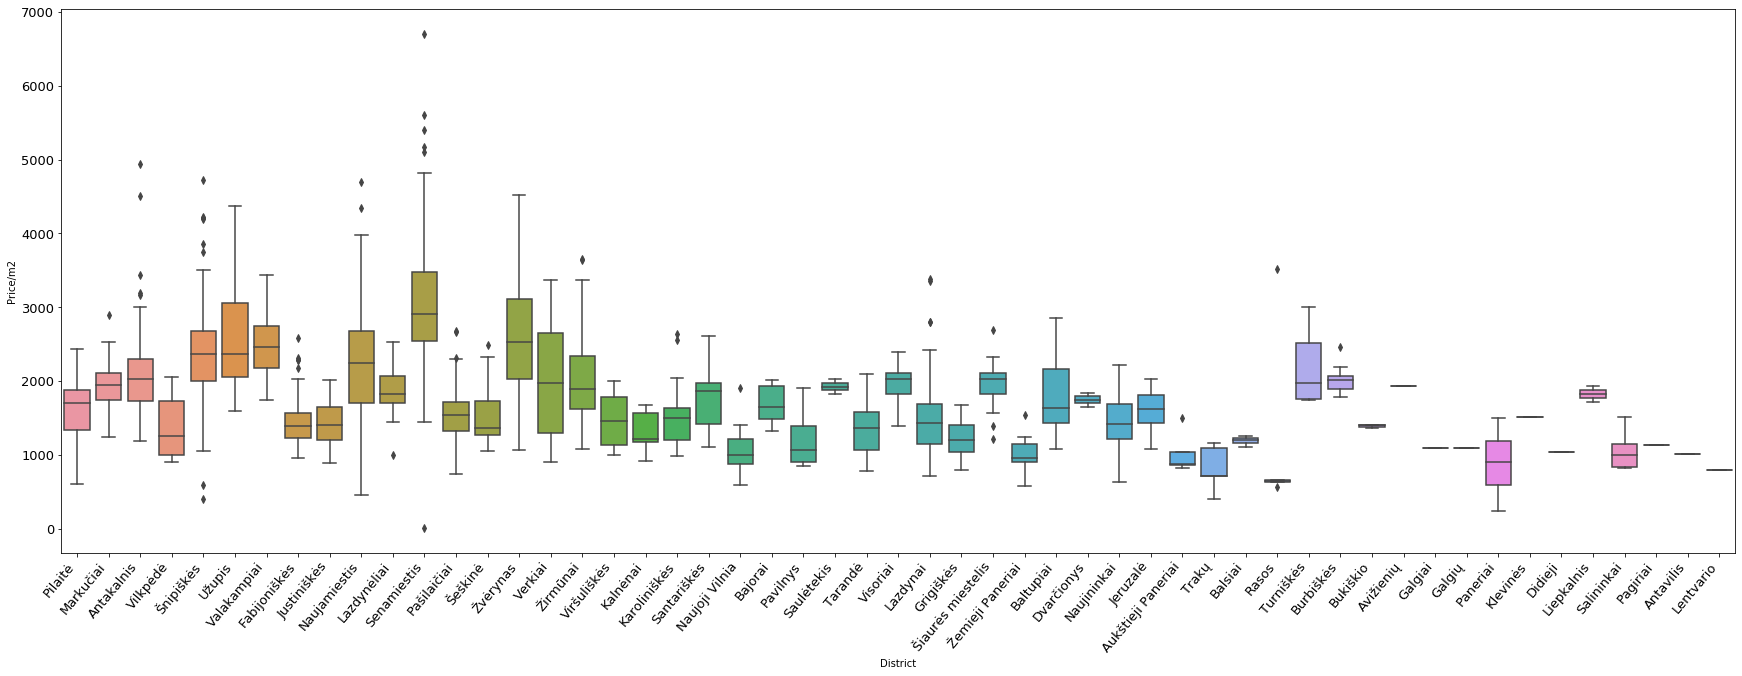

In [208]:
#Plot the same data by district only looking at prices per sq.m.
#Old Town (Senamiestis) has most expensive prices. Zverynas, New Town (Naujamiestis), Snipiskes are the second most expensive parts of the city. 
plt.figure(figsize=(30,10))
ax = sns.boxplot(x='District', y='Price/m2', data=rental_properties1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.tick_params(labelsize=13)

In [209]:
#Get the table of all apparments in Vilnius arranged by name
mean_per_district = rental_properties1.groupby('District').mean().reset_index()
print(mean_per_district)

              District        Area     Rooms          Price     Price/m2
0           Antakalnis   71.110000  2.753165  146411.227848  2077.396203
1            Antavilis   25.610000  2.000000   26000.000000  1015.230000
2   Aukštieji Paneriai   35.512500  1.500000   35475.000000  1020.792500
3            Avižienių   16.000000  1.000000   31000.000000  1937.500000
4              Bajorai   56.723871  2.483871   94860.000000  1684.405161
5              Balsiai   76.396667  3.333333   89966.666667  1190.666667
6            Baltupiai   59.087297  2.432432  102664.594595  1798.111622
7             Bukiškio   35.333333  2.000000   49000.000000  1387.036667
8            Burbiškės   57.454118  2.411765  115382.352941  1999.901765
9              Didieji   70.340000  3.000000   73000.000000  1037.735000
10          Dvarčionys   26.000000  1.500000   46150.000000  1746.900000
11        Fabijoniškės   61.421364  2.636364   86460.590909  1466.057727
12             Galgiai  100.000000  3.000000  10900

In [210]:
#Correct Naujoji Vilnia name making 2 spaces instead of 1. This will be needed in the future when this table will be merged with municipality data.
mean_per_district['District'] = mean_per_district['District'].replace(['Naujoji Vilnia'], 'Naujoji  Vilnia')
mean_per_district

,District,Area,Rooms,Price,Price/m2
0,Antakalnis,71.110000,2.753165,146411.227848,2077.396203
1,Antavilis,25.610000,2.000000,26000.000000,1015.230000
2,Aukštieji Paneriai,35.512500,1.500000,35475.000000,1020.792500
3,Avižienių,16.000000,1.000000,31000.000000,1937.500000
4,Bajorai,56.723871,2.483871,94860.000000,1684.405161
5,Balsiai,76.396667,3.333333,89966.666667,1190.666667
6,Baltupiai,59.087297,2.432432,102664.594595,1798.111622
7,Bukiškio,35.333333,2.000000,49000.000000,1387.036667
8,Burbiškės,57.454118,2.411765,115382.352941,1999.901765
9,Didieji,70.340000,3.000000,73000.000000,1037.735000


In [211]:
# create map of Vilnius using latitude and longitude values
map_vilnius = folium.Map(location=[latitude, longitude], zoom_start=12)

# add the data
map_vilnius.choropleth(
    geo_data=vilnius_data,
    data=mean_per_district,
    columns=['District', 'Price/m2'],
    key_on='feature.properties.SENIUNIJA',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average price/m2 for each district in Vilnius'
)

# add markers to map
for lat, lng, neighborhood in zip(vilnius_districts['lat'], vilnius_districts['lon'], vilnius_districts['District(eng)']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vilnius)  

#Show the map of Vilnius including all districts and showing the average price per sq m.
map_vilnius

In [212]:
#Connect to Foursquare API
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1EO4T4Q1JBHTI5OZP15JBOAIUP32QLM1UAU1LORCI5AUYECR
CLIENT_SECRET:FFNGMHGYPCUJMV3RXKYVCJUYS0DVCAZM41HOUJKAEWTJ2YUM


In [213]:
#Get Vilnius venues information from Foursquare
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [214]:
#Create dataframe of Vilnius venues

vilnius_venues = getNearbyVenues(names=vilnius_districts['District'],
                                   latitudes=vilnius_districts['lat'],
                                   longitudes=vilnius_districts['lon'],
                                   radius=2000, LIMIT=100)

In [215]:
vilnius_venues.head()

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rasos,54.656456,25.318583,Liepkalnis,54.655538,25.307178,Ski Area
1,Rasos,54.656456,25.318583,Hotel Campanile,54.650805,25.317124,Hotel
2,Rasos,54.656456,25.318583,Tores Bravoras,54.661399,25.337798,Brewery
3,Rasos,54.656456,25.318583,ibis Styles Vilnius,54.650735,25.317077,Hotel
4,Rasos,54.656456,25.318583,Hesburger - Vilnius Liepkalnio Maxima,54.653469,25.303903,Fast Food Restaurant


In [216]:
# Show how many venues are in dataframe
print('{} venues are collected'.format(vilnius_venues.shape[0]))

948 venues are collected


In [217]:
#Group Vilnius venues by district
vilnius_venues.groupby('District').count()

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Antakalnis,6,6,6,6,6,6
Fabijoniškės,57,57,57,57,57,57
Grigiškės,7,7,7,7,7,7
Justiniškės,46,46,46,46,46,46
Karoliniškės,51,51,51,51,51,51
Lazdynai,24,24,24,24,24,24
Naujamiestis,100,100,100,100,100,100
Naujininkai,6,6,6,6,6,6
Naujoji Vilnia,9,9,9,9,9,9


In [218]:
#Show how many unique categories are of each venue
print('There are {} uniques categories.'.format(len(vilnius_venues['Venue Category'].unique())))

There are 174 uniques categories.


In [219]:
# one hot encoding
vilnius_onehot = pd.get_dummies(vilnius_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
vilnius_onehot['District'] = vilnius_venues['District'] 

# move neighborhood column to the first column
fixed_columns = [vilnius_onehot.columns[-1]] + list(vilnius_onehot.columns[:-1])
vilnius_onehot = vilnius_onehot[fixed_columns]

vilnius_onehot.head()

,District,Airport Service,Airport Terminal,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,...,Turkish Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio
0,Rasos,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Rasos,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Rasos,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Rasos,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Rasos,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [220]:
#Get all unique venues with average occurance in each district
vilnius_grouped = vilnius_onehot.groupby('District').mean().reset_index()
vilnius_grouped

,District,Airport Service,Airport Terminal,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,...,Turkish Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio
0,Antakalnis,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00
1,Fabijoniškės,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.017544,0.000000,0.017544,...,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.017544,0.00
2,Grigiškės,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00
3,Justiniškės,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.021739,0.000000,...,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.021739,0.00
4,Karoliniškės,0.000000,0.000000,0.00,0.00,0.000000,0.019608,0.019608,0.019608,0.000000,...,0.000000,0.00,0.00,0.019608,0.00,0.00,0.00,0.00,0.000000,0.00
5,Lazdynai,0.000000,0.000000,0.00,0.00,0.041667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00
6,Naujamiestis,0.000000,0.000000,0.00,0.00,0.000000,0.020000,0.000000,0.000000,0.010000,...,0.000000,0.01,0.00,0.000000,0.00,0.00,0.01,0.01,0.000000,0.01
7,Naujininkai,0.333333,0.166667,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00
8,Naujoji Vilnia,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00
9,Paneriai,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00


In [221]:
#Create a function to get most common venues in each district
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [222]:
#Get top 10 venues by each disctric in Vilnius

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for idx in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(idx+1, indicators[idx]))
    except:
        columns.append('{}th Most Common Venue'.format(idx+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = vilnius_grouped['District']

for idx in np.arange(vilnius_grouped.shape[0]):
    district_venues_sorted.iloc[idx, 1:] = return_most_common_venues(vilnius_grouped.iloc[idx, :], num_top_venues)

In [223]:
district_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Antakalnis,Food Truck,Campground,Lake,Garden,Park,Food & Drink Shop,Department Store,Electronics Store,Flower Shop,Flea Market
1,Fabijoniškės,Grocery Store,Gym / Fitness Center,Fast Food Restaurant,Pizza Place,Food & Drink Shop,Bus Station,Supermarket,Electronics Store,Bed & Breakfast,Market
2,Grigiškės,Bus Stop,Fast Food Restaurant,Pharmacy,Grocery Store,River,Soccer Field,Shopping Mall,Yoga Studio,Farmers Market,Electronics Store
3,Justiniškės,Supermarket,Gym / Fitness Center,Grocery Store,Pizza Place,Flea Market,Coffee Shop,Gym,Bed & Breakfast,Fast Food Restaurant,Soccer Stadium
4,Karoliniškės,Park,Pizza Place,Restaurant,Grocery Store,Gym,Office,Diner,Café,Soccer Field,Shop & Service
5,Lazdynai,Park,Café,Fast Food Restaurant,Grocery Store,Bus Station,Restaurant,Chinese Restaurant,Campground,Bus Stop,Food Court
6,Naujamiestis,Coffee Shop,Gym,Restaurant,Hotel,Bar,Café,Dessert Shop,Plaza,Pizza Place,Museum
7,Naujininkai,Airport Service,Airport Terminal,Hardware Store,Fast Food Restaurant,Soccer Field,Donut Shop,Flower Shop,Flea Market,Fishing Store,Farmers Market
8,Naujoji Vilnia,Park,Mountain,Market,Convenience Store,Supermarket,Soccer Field,Yoga Studio,Eastern European Restaurant,Fishing Store,Fast Food Restaurant
9,Paneriai,Business Service,Diner,Market,Fast Food Restaurant,Furniture / Home Store,Eastern European Restaurant,Train Station,Food & Drink Shop,Dessert Shop,Department Store


k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9


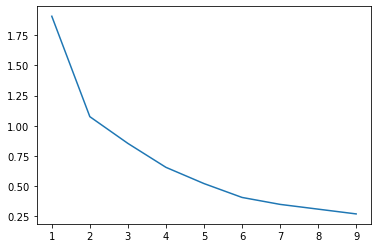

In [224]:
#Use elbow criterion to decide how many clusters do we need do sort Vilnius districts
#The elbow shows biggest horizontal trend for 2 and 6 clusters. 
# Elbow criterion
def elbow_plot(data, maxK=10, seed_centroids=None):
    """
        parameters:
        - data: pandas DataFrame (data to be fitted)
        - maxK (default = 10): integer (maximum number of clusters with which to run k-means)
        - seed_centroids (default = None ): float (initial value of centroids for k-means)
    """
    sse = {}
    for k in range(1, maxK):
        print("k: ", k)
        if seed_centroids is not None:
            seeds = seed_centroids.head(k)
            kmeans = KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(seeds, (k,1))).fit(data)
            data["clusters"] = kmeans.labels_
        else:
            kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
            data["clusters"] = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return

elbow_plot(vilnius_venues[['Venue Latitude', 'Venue Longitude']].copy(), maxK=10)

In [225]:
# set number of clusters to 6 because elbow cirterion shows horizontal trend on number 6
kclusters = 6

vilnius_grouped_clustering = vilnius_grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(vilnius_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:25]

array([3, 0, 5, 0, 0, 0, 0, 1, 2, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [226]:
# add clustering labels
district_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [227]:
#mere two dataframes by District and Price per sq.m.
vilnius_merged = pd.merge(vilnius_districts, mean_per_district[['District', 'Price/m2']])
vilnius_merged

,District,lat,lon,District(eng),Price/m2
0,Rasos,54.656456,25.318583,Rasos,1203.958000
1,Naujamiestis,54.678918,25.266083,Naujamiestis,2212.346818
2,Senamiestis,54.681296,25.292811,Senamiestis,2993.788852
3,Vilkpėdė,54.660149,25.226736,Vilkpede,1362.176000
4,Lazdynai,54.667952,25.205353,Lazdynai,1541.340750
5,Naujininkai,54.625639,25.261739,Naujininkai,1437.891220
6,Grigiškės,54.672558,25.100786,Grigiskes,1210.420500
7,Paneriai,54.622787,25.139768,Paneriai,887.605000
8,Verkiai,54.774566,25.307723,Verkiai,2016.639091
9,Antakalnis,54.750065,25.381356,Antakalnis,2077.396203


In [228]:
# add price/m2 for each district
vilnius_merged = pd.merge(vilnius_merged, district_venues_sorted, on='District')
vilnius_merged

,District,lat,lon,District(eng),Price/m2,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Rasos,54.656456,25.318583,Rasos,1203.958000,0,Hotel,Ski Area,Park,Brewery,Shopping Mall,Shoe Store,Eastern European Restaurant,Dog Run,Supermarket,Diner
1,Naujamiestis,54.678918,25.266083,Naujamiestis,2212.346818,0,Coffee Shop,Gym,Restaurant,Hotel,Bar,Café,Dessert Shop,Plaza,Pizza Place,Museum
2,Senamiestis,54.681296,25.292811,Senamiestis,2993.788852,0,Coffee Shop,Bar,Park,Restaurant,Dessert Shop,Beer Bar,Museum,Café,Bakery,Pub
3,Vilkpėdė,54.660149,25.226736,Vilkpede,1362.176000,0,Gym,Restaurant,Sporting Goods Shop,Convenience Store,Pizza Place,Bookstore,Shipping Store,Fast Food Restaurant,Hotel,Cosmetics Shop
4,Lazdynai,54.667952,25.205353,Lazdynai,1541.340750,0,Park,Café,Fast Food Restaurant,Grocery Store,Bus Station,Restaurant,Chinese Restaurant,Campground,Bus Stop,Food Court
5,Naujininkai,54.625639,25.261739,Naujininkai,1437.891220,1,Airport Service,Airport Terminal,Hardware Store,Fast Food Restaurant,Soccer Field,Donut Shop,Flower Shop,Flea Market,Fishing Store,Farmers Market
6,Grigiškės,54.672558,25.100786,Grigiskes,1210.420500,5,Bus Stop,Fast Food Restaurant,Pharmacy,Grocery Store,River,Soccer Field,Shopping Mall,Yoga Studio,Farmers Market,Electronics Store
7,Paneriai,54.622787,25.139768,Paneriai,887.605000,4,Business Service,Diner,Market,Fast Food Restaurant,Furniture / Home Store,Eastern European Restaurant,Train Station,Food & Drink Shop,Dessert Shop,Department Store
8,Verkiai,54.774566,25.307723,Verkiai,2016.639091,3,Lake,Grocery Store,Campground,Garden,Outdoors & Recreation,Yoga Studio,Donut Shop,Flea Market,Fishing Store,Fast Food Restaurant
9,Antakalnis,54.750065,25.381356,Antakalnis,2077.396203,3,Food Truck,Campground,Lake,Garden,Park,Food & Drink Shop,Department Store,Electronics Store,Flower Shop,Flea Market


In [229]:
#Calculate how many districts are in each cluster and arrange them in descending order
vilnius_merged['Cluster Labels'].value_counts().sort_values(ascending=False)

0    15
3     2
1     1
2     1
4     1
5     1
Name: Cluster Labels, dtype: int64

In [230]:
# create Vilnius map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)


# add the data
map_clusters.choropleth(
    geo_data=vilnius_data,
    data=mean_per_district,
    columns=['District', 'Price/m2'],
    key_on='feature.properties.SENIUNIJA',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Vilnius clusters and average apparment price/m2 in Vilnius districts'
)


# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.ocean(np.linspace(0, 1, len(ys)))
ocean = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(vilnius_merged['lat'], vilnius_merged['lon'], vilnius_merged['District(eng)'], vilnius_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=ocean[cluster-1],
        fill=True,
        fill_color=ocean[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

#Create a map including data from clustering and appartment price/m2
map_clusters

In [231]:
#Get more detailed data about each cluster, starting from largest cluster and ending to smallest
# Cluster 0 is can be described as residential
vilnius_merged.loc[vilnius_merged['Cluster Labels'] == 0, vilnius_merged.columns[[3] + list(range(5, vilnius_merged.shape[1]))]]

,District(eng),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Rasos,0,Hotel,Ski Area,Park,Brewery,Shopping Mall,Shoe Store,Eastern European Restaurant,Dog Run,Supermarket,Diner
1,Naujamiestis,0,Coffee Shop,Gym,Restaurant,Hotel,Bar,Café,Dessert Shop,Plaza,Pizza Place,Museum
2,Senamiestis,0,Coffee Shop,Bar,Park,Restaurant,Dessert Shop,Beer Bar,Museum,Café,Bakery,Pub
3,Vilkpede,0,Gym,Restaurant,Sporting Goods Shop,Convenience Store,Pizza Place,Bookstore,Shipping Store,Fast Food Restaurant,Hotel,Cosmetics Shop
4,Lazdynai,0,Park,Café,Fast Food Restaurant,Grocery Store,Bus Station,Restaurant,Chinese Restaurant,Campground,Bus Stop,Food Court
10,Pasilaiciai,0,Supermarket,Grocery Store,Pizza Place,Bar,Burger Joint,Burrito Place,Kebab Restaurant,Cafeteria,Beer Store,Bed & Breakfast
11,Fabijoniskes,0,Grocery Store,Gym / Fitness Center,Fast Food Restaurant,Pizza Place,Food & Drink Shop,Bus Station,Supermarket,Electronics Store,Bed & Breakfast,Market
12,Zirmunai,0,Coffee Shop,Pizza Place,Clothing Store,Park,Gym,Gym / Fitness Center,Bakery,Supermarket,Burger Joint,Shoe Store
13,Pilaite,0,Supermarket,Forest,Hotel,Restaurant,Fast Food Restaurant,Coffee Shop,Lake,Kebab Restaurant,Steakhouse,Beach
14,Justiniskes,0,Supermarket,Gym / Fitness Center,Grocery Store,Pizza Place,Flea Market,Coffee Shop,Gym,Bed & Breakfast,Fast Food Restaurant,Soccer Stadium


In [232]:
#Cluster 3 can be described as recreational part of the city
vilnius_merged.loc[vilnius_merged['Cluster Labels'] == 3, vilnius_merged.columns[[3] + list(range(5, vilnius_merged.shape[1]))]]

,District(eng),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Verkiai,3,Lake,Grocery Store,Campground,Garden,Outdoors & Recreation,Yoga Studio,Donut Shop,Flea Market,Fishing Store,Fast Food Restaurant
9,Antakalnis,3,Food Truck,Campground,Lake,Garden,Park,Food & Drink Shop,Department Store,Electronics Store,Flower Shop,Flea Market


In [233]:
#Cluster 2 it is one of the most underdeveloped parts of the city which has a great potential to become residetial
vilnius_merged.loc[vilnius_merged['Cluster Labels'] == 2, vilnius_merged.columns[[3] + list(range(5, vilnius_merged.shape[1]))]]

,District(eng),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Naujoji Vilnia,2,Park,Mountain,Market,Convenience Store,Supermarket,Soccer Field,Yoga Studio,Eastern European Restaurant,Fishing Store,Fast Food Restaurant


In [234]:
#Cluster 1 it is airport zone
vilnius_merged.loc[vilnius_merged['Cluster Labels'] == 1, vilnius_merged.columns[[3] + list(range(5, vilnius_merged.shape[1]))]]

,District(eng),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Naujininkai,1,Airport Service,Airport Terminal,Hardware Store,Fast Food Restaurant,Soccer Field,Donut Shop,Flower Shop,Flea Market,Fishing Store,Farmers Market


In [235]:
#Cluster 4 can be described as industrial part of Vilnius
vilnius_merged.loc[vilnius_merged['Cluster Labels'] == 4, vilnius_merged.columns[[3] + list(range(5, vilnius_merged.shape[1]))]]

,District(eng),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Paneriai,4,Business Service,Diner,Market,Fast Food Restaurant,Furniture / Home Store,Eastern European Restaurant,Train Station,Food & Drink Shop,Dessert Shop,Department Store


In [236]:
#Cluster 5 can be treated as outlier which is outside Vilnius and can be treated as Vilnius suburb.
vilnius_merged.loc[vilnius_merged['Cluster Labels'] == 5, vilnius_merged.columns[[3] + list(range(5, vilnius_merged.shape[1]))]]

,District(eng),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Grigiskes,5,Bus Stop,Fast Food Restaurant,Pharmacy,Grocery Store,River,Soccer Field,Shopping Mall,Yoga Studio,Farmers Market,Electronics Store
